In [1]:
!pip install pylatexenc
!pip install qiskit_nature
!pip install qutip
!pip install pyscf

  Using cached qutip-4.7.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.7 MB)


In [21]:
import numpy as np
import scipy as sp
from qiskit import Aer
from qiskit.opflow import PauliTrotterEvolution, StateFn, PauliExpectation
from qiskit.opflow import CircuitSampler, PauliOp
from qiskit.opflow import I, X, Y, Z, Zero, One, Plus, Minus
from qiskit.circuit import Parameter

In [29]:
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.quantum_info import *
from qiskit.circuit import *
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.quantum_info import *

import numpy as np
from numpy import pi, sqrt, array
import matplotlib.pyplot as plt

# Loading IBM Quantum account(s)
provider = IBMQ.load_account()
qasm = QasmSimulator()

# Define Molecular Geometrie

In [2]:
from qiskit_nature.units import DistanceUnit
from qiskit_nature.second_q.drivers import PySCFDriver


# Use PySCF, a classical computational chemistry software
# electronic-orbital basis, necessary to form the Fermionic operator
driver = PySCFDriver(
    atom="H 0 0 0; H 0 0 0.735",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# run in the deriver 

In [3]:
problem = driver.run()
print(problem)

# Apply second Quantization

In [5]:
from qiskit_nature.second_q.drivers import PySCFDriver

driver = PySCFDriver()
problem = driver.run()
second_q_op = problem.hamiltonian.second_q_op()
print(second_q_op)

Fermionic Operator
number spin orbitals=4, number terms=36
  0.33785507740175813 * ( +_0 +_0 -_0 -_0 )
+ 0.09046559989211565 * ( +_0 +_0 -_1 -_1 )
+ 0.09046559989211556 * ( +_0 +_1 -_0 -_1 )
+ 0.33229086512764827 * ( +_0 +_1 -_1 -_0 )
+ 0.33785507740175813 * ( +_0 +_2 -_2 -_0 )
+ 0.09046559989211565 * ( +_0 +_2 -_3 -_1 )
+ 0.09046559989211556 * ( +_0 +_3 -_2 -_1 )
+ 0.33229086512764827 * ( +_0 +_3 -_3 -_0 )
+ 0.33229086512764816 * ( +_1 +_0 -_0 -_1 )
+ 0.09046559989211574 * ( +_1 +_0 -_1 -_0 )
+ 0.09046559989211564 * ( +_1 +_1 -_0 -_0 )
+ 0.34928686136600906 * ( +_1 +_1 -_1 -_1 )
+ 0.33229086512764816 * ( +_1 +_2 -_2 -_1 )
+ 0.09046559989211574 * ( +_1 +_2 -_3 -_0 )
+ 0.09046559989211564 * ( +_1 +_3 -_2 -_0 )
+ 0.34928686136600906 * ( +_1 +_3 -_3 -_1 )
+ 0.33785507740175813 * ( +_2 +_0 -_0 -_2 )
+ 0.09046559989211565 * ( +_2 +_0 -_1 -_3 )
+ 0.09046559989211556 * ( +_2 +_1 -_0 -_3 )
+ 0.33229086512764827 * ( +_2 +_1 -_1 -_2 )
+ 0.33785507740175813 * ( +_2 +_2 -_2 -_2 )
+ 0.0904655998921

# mapped Quantized Hamiltonian to Qubit 

In [6]:
from qiskit_nature.second_q.mappers import JordanWignerMapper
from qiskit_nature.second_q.mappers import BravyiKitaevMapper

#mapper = JordanWignerMapper() 
mapper = BravyiKitaevMapper()

qubit_bk_op = mapper.map(second_q_op)
print(qubit_bk_op)

-0.8105479805373283 * IIII
+ 0.17218393261915543 * IIIZ
- 0.2257534922240237 * IIZZ
+ 0.12091263261776633 * IIZI
+ 0.17218393261915543 * IZII
+ 0.16892753870087907 * IZIZ
+ 0.045232799946057826 * ZXIX
- 0.045232799946057826 * IXZX
- 0.045232799946057826 * ZXZX
+ 0.045232799946057826 * IXIX
- 0.22575349222402363 * ZZZI
+ 0.1661454325638241 * ZZZZ
+ 0.16614543256382408 * IZZZ
+ 0.1746434306830045 * ZZIZ
+ 0.12091263261776633 * ZIZI


In [ ]:
num_qubit= qubit_bk_op.num_qubits
print(f'Number of qubits: {num_qubit}')

Number of qubits: 4


# Use Ground State Solvers to get acess to the chemical propreties of Hydrogen molecul : The solver is the algorithm through which the ground state is computed

In [15]:
from qiskit_nature.second_q.algorithms import GroundStateEigensolver, NumPyMinimumEigensolverFactory
from qiskit_nature.second_q.mappers import JordanWignerMapper, QubitConverter

solver = GroundStateEigensolver(
    QubitConverter(BravyiKitaevMapper()),
    NumPyMinimumEigensolverFactory(),
)

In [16]:
result = solver.solve(problem)
print(result)

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -1.857275030202
  - computed part:      -1.857275030202
~ Nuclear repulsion energy (Hartree): 0.719968994449
> Total ground state energy (Hartree): -1.137306035753
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  1.3889487]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  1.3889487]
    - computed part:      [0.0  0.0  1.3889487]
  > Dipole moment (a.u.): [0.0  0.0  0.0]  Total: 0.0
                 (debye): [0.0  0.0  0.0]  Total: 0.0
 


# time evolution using Troterization

In [22]:
evo_time = Parameter('t')
evolution_op = (evo_time*qubit_bk_op).exp_i()
print(evolution_op) 

e^(-i*1.0*t * (
  -0.8105479805373283 * IIII
  + 0.17218393261915543 * IIIZ
  - 0.2257534922240237 * IIZZ
  + 0.12091263261776633 * IIZI
  + 0.17218393261915543 * IZII
  + 0.16892753870087907 * IZIZ
  + 0.045232799946057826 * ZXIX
  - 0.045232799946057826 * IXZX
  - 0.045232799946057826 * ZXZX
  + 0.045232799946057826 * IXIX
  - 0.22575349222402363 * ZZZI
  + 0.1661454325638241 * ZZZZ
  + 0.16614543256382408 * IZZZ
  + 0.1746434306830045 * ZZIZ
  + 0.12091263261776633 * ZIZI
))


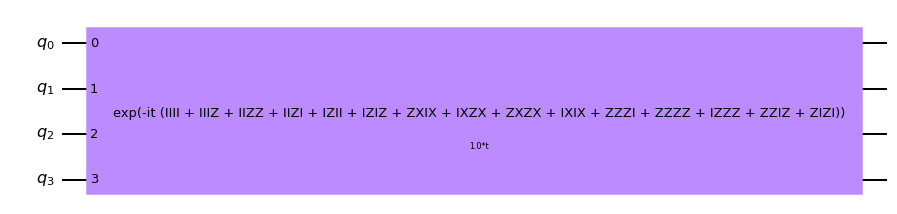

In [26]:
num_time_slices = 1
trotterized_op = PauliTrotterEvolution(
                    trotter_mode='trotter', 
                    reps=num_time_slices).convert(evolution_op)
circ= trotterized_op.to_circuit() 
circ.draw()

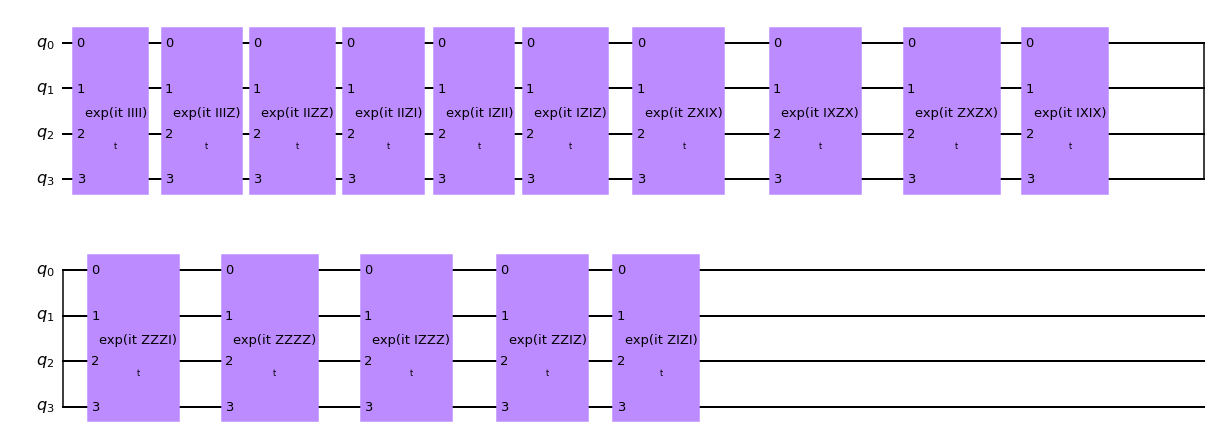

In [27]:
trotterized_op.to_circuit().decompose().draw('mpl')

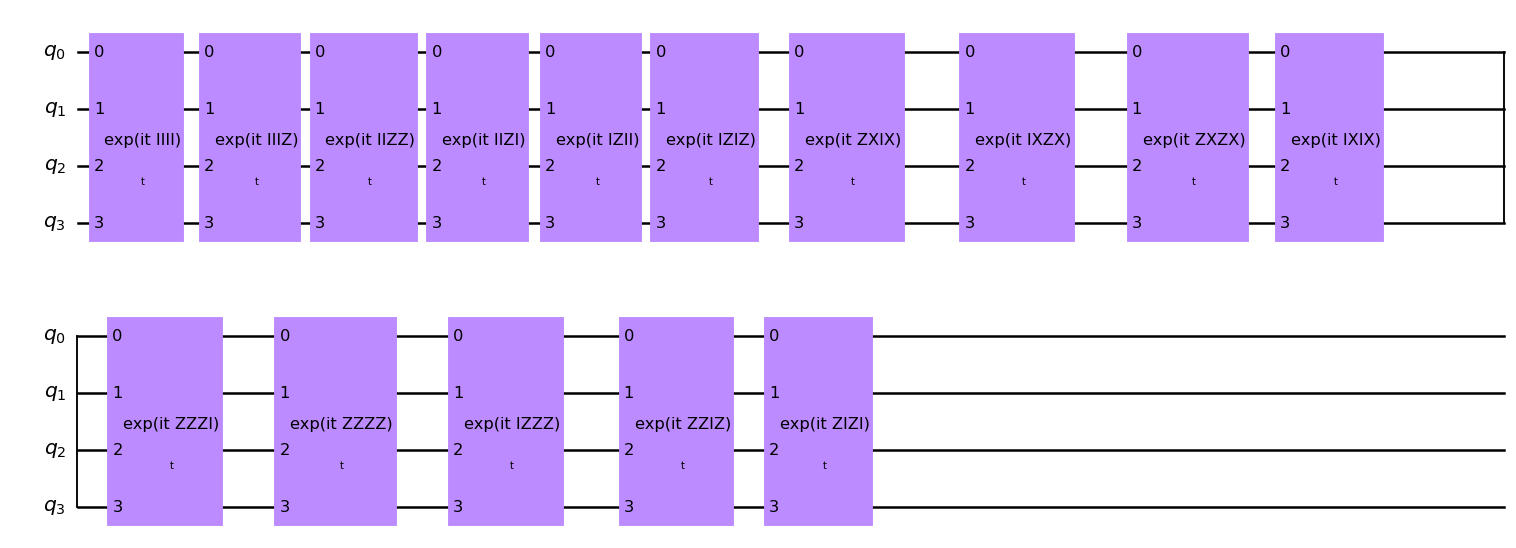

In [31]:

circ.decompose().draw(scale = 1.25)


# initial state

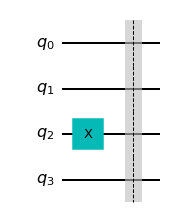

In [50]:
ini_qc = QuantumCircuit(4)
ini_qc.x(2)
ini_qc.barrier()
ini_qc.draw()

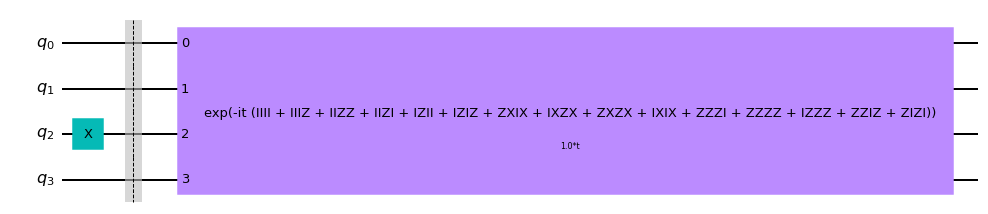

In [52]:
#new_qc= ini_qc+circ
new_qc = ini_qc.compose(circ)
new_qc.draw()

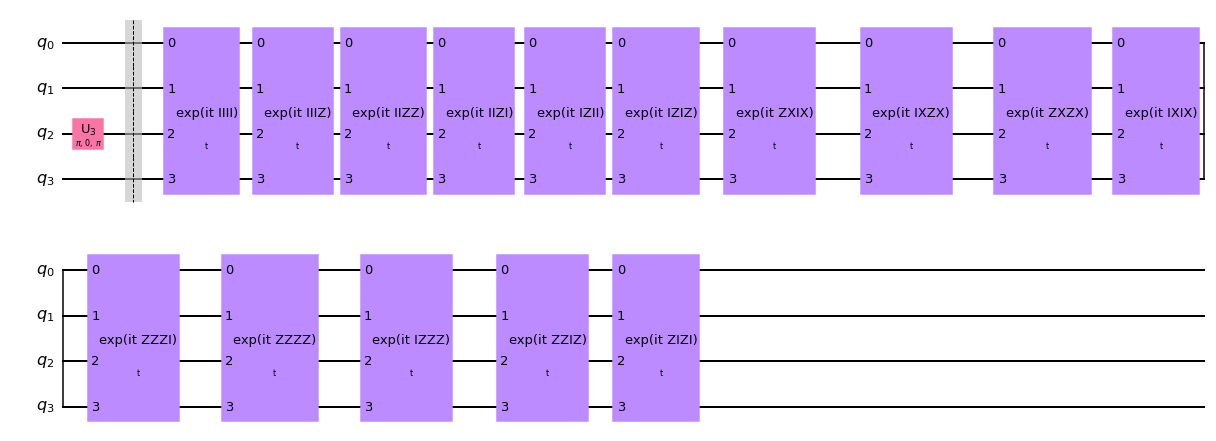

In [55]:
new_qc.decompose().draw()

In [56]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_ibm_provider import IBMProvider



In [57]:
provider= IBMProvider()
backend= provider.get_backend('ibmq_manila',instance='ibm-q/open/main')

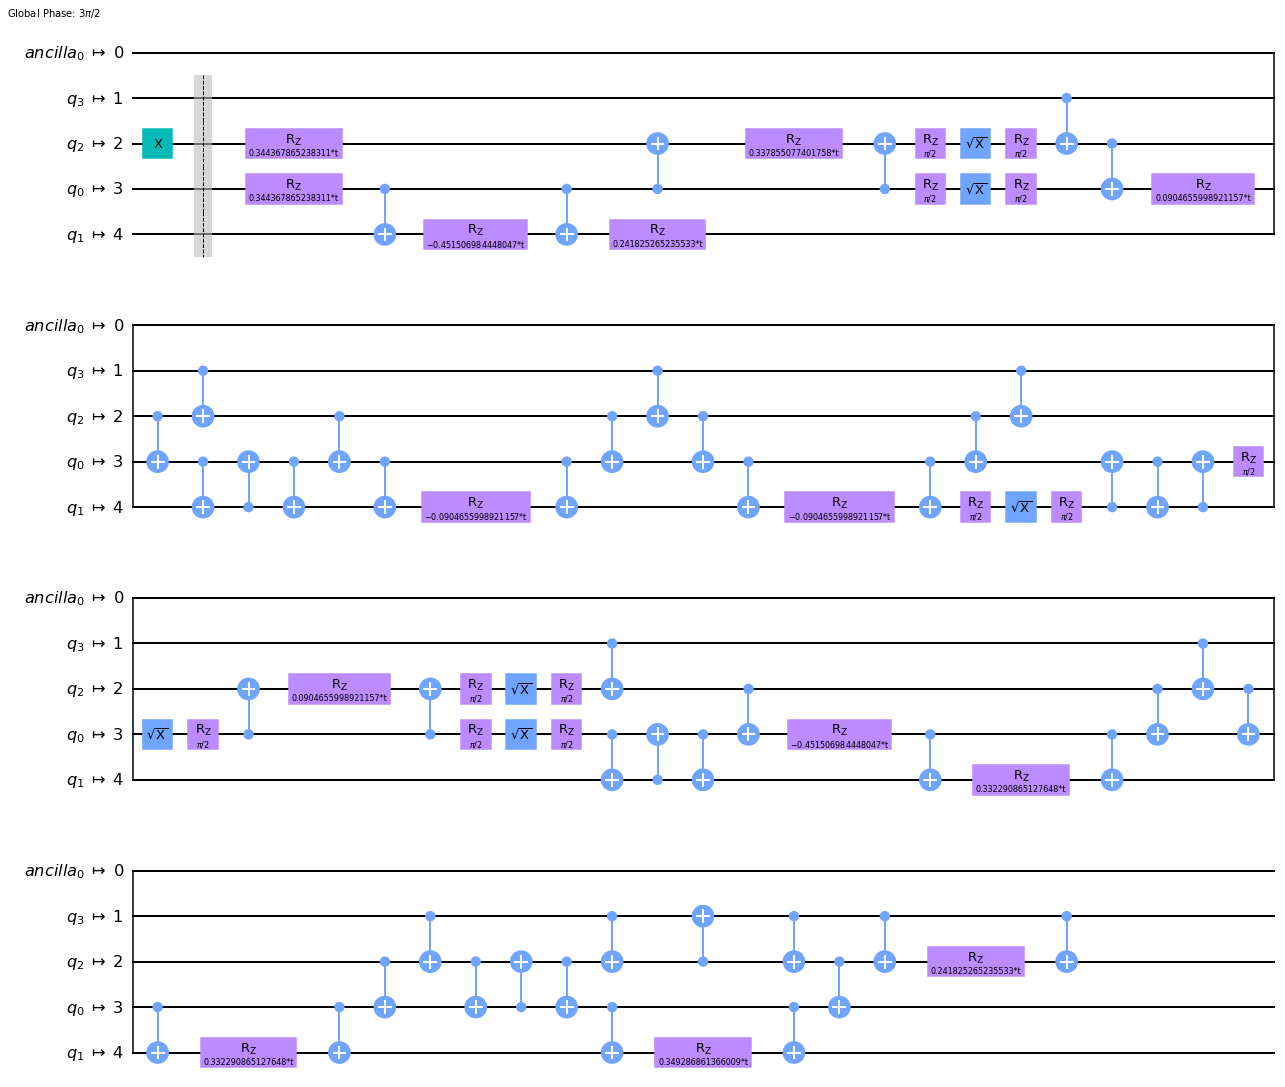

In [58]:
from qiskit import transpile
t_qc= transpile(new_qc, backend)
t_qc.draw()

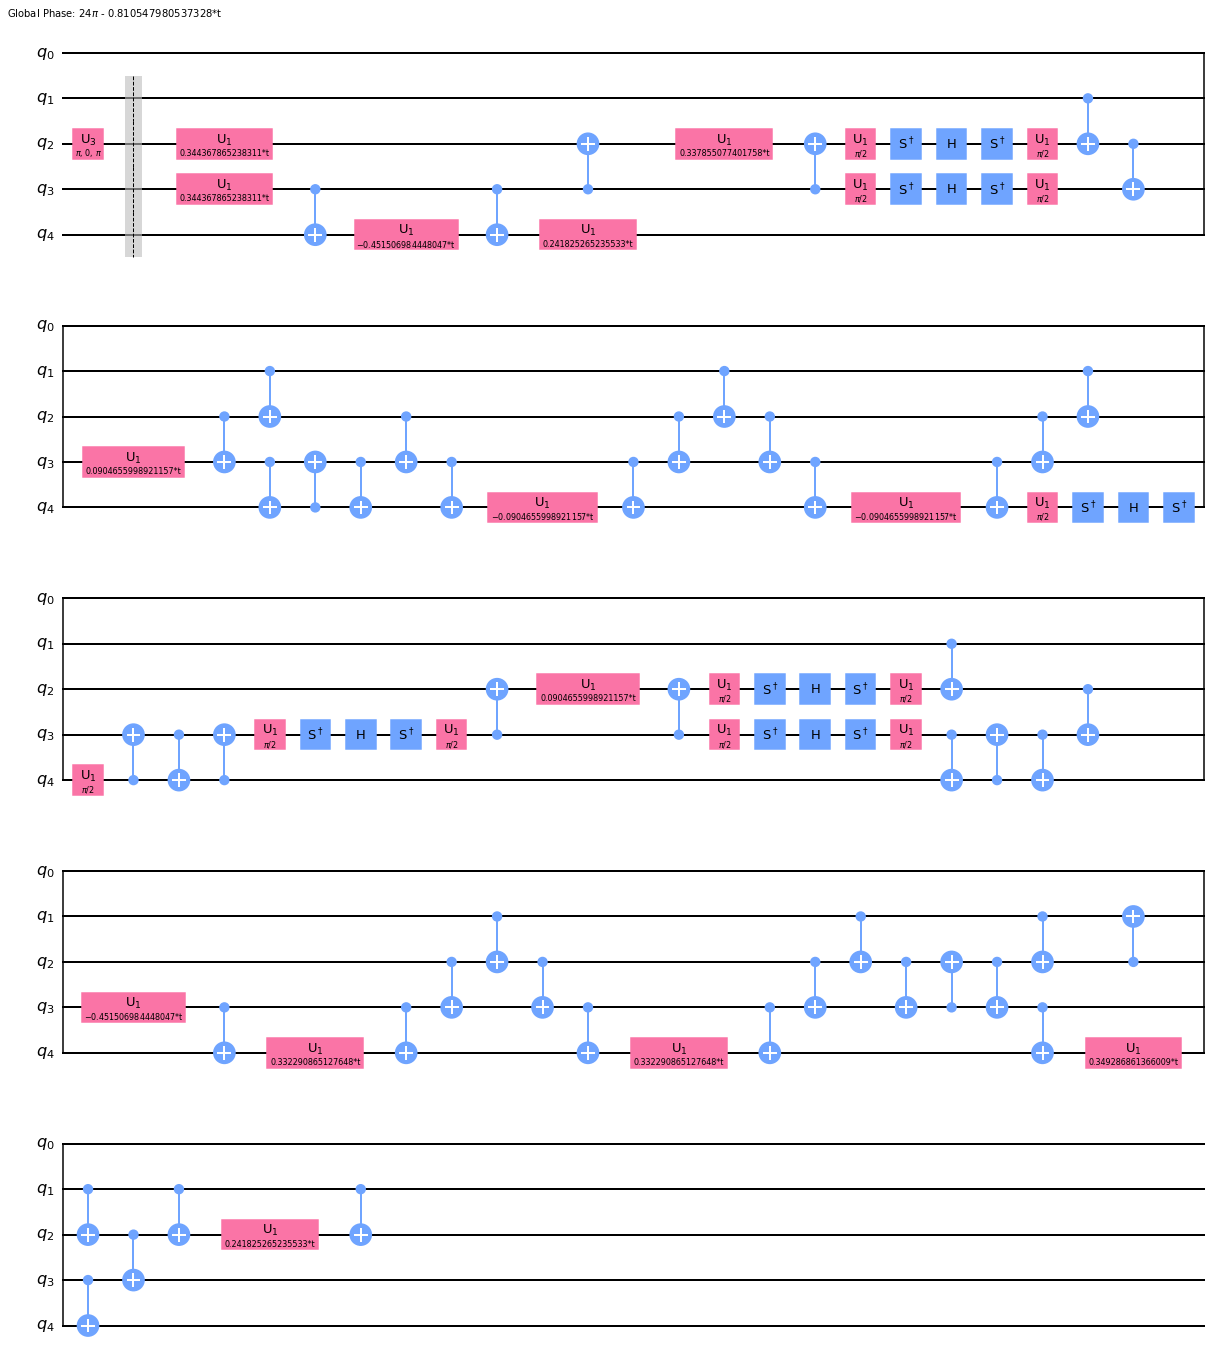

In [63]:
t_qc.decompose().draw()

In [8]:
!pip install PyPI

In [10]:
!pip install qiskit_aqua


     |████████████████████████████████| 2.1 MB 23.0 MB/s eta 0:00:01
     |████████████████████████████████| 198 kB 72.0 MB/s eta 0:00:01
     |████████████████████████████████| 4.5 MB 75.6 MB/s eta 0:00:01
  Created wheel for dlx: filename=dlx-1.0.4-py3-none-any.whl size=5719 sha256=8c5ea68a832d7b04a48e50ad052782c4385dc12385536b8ba44433b7689d451f
  Stored in directory: /home/jovyan/.cache/pip/wheels/c4/03/f9/7afbf40e0c3d6928d16bcadb46264a6e68704998ec72f7ea13
Successfully built dlx
  Attempting uninstall: h5py
    Found existing installation: h5py 3.6.0
    Uninstalling h5py-3.6.0:
      Successfully uninstalled h5py-3.6.0


In [17]:
#from qiskit import __qiskit_version__
from qiskit.aqua.algorithms import QPE
from qiskit.aqua.components.initial_states import Custom
from qiskit import BasicAer, Aer
#from qiskit import IBMQ, QuantumCircuit
#from qiskit.aqua import QuantumInstance
from qiskit.circuit.library import QFT

Traceback (most recent call last):
  Input In [17] in <cell line: 2>
    from qiskit.aqua.algorithms import QPE
  File /opt/conda/lib/python3.8/site-packages/qiskit/aqua/__init__.py:76 in <module>
    from .quantum_instance import QuantumInstance
  File /opt/conda/lib/python3.8/site-packages/qiskit/aqua/quantum_instance.py:21 in <module>
    from qiskit.providers import Backend, BaseBackend
ImportError: cannot import name 'BaseBackend' from 'qiskit.providers' (/opt/conda/lib/python3.8/site-packages/qiskit/providers/__init__.py)

Use %tb to get the full traceback.


In [20]:
from qiskit.aqua.algorithms import QPE
from qiskit.providers import Backend, BaseBackend
from qiskit import BasicAer, Aer

Traceback (most recent call last):
  Input In [20] in <cell line: 1>
    from qiskit.aqua.algorithms import QPE
  File /opt/conda/lib/python3.8/site-packages/qiskit/aqua/__init__.py:76 in <module>
    from .quantum_instance import QuantumInstance
  File /opt/conda/lib/python3.8/site-packages/qiskit/aqua/quantum_instance.py:21 in <module>
    from qiskit.providers import Backend, BaseBackend
ImportError: cannot import name 'BaseBackend' from 'qiskit.providers' (/opt/conda/lib/python3.8/site-packages/qiskit/providers/__init__.py)

Use %tb to get the full traceback.


In [3]:
backend = Aer.get_backend('statevector_simulator')

n_ancillae=2

#iqft = QFT(n_ancillae).inverse()

qpe = QPE(operator=qubit_bk_op, state_in=None, iqft=None, 
          num_time_slices=1, num_ancillae=n_ancillae, 
          expansion_mode='trotter', expansion_order=1, 
          shallow_circuit_concat=False)

quantum_instance = QuantumInstance(backend=backend)



Traceback (most recent call last):
  Input In [3] in <cell line: 3>
    qpe = QPE(operator=qubit_bk_op, state_in=None, iqft=None,
NameError: name 'QPE' is not defined

Use %tb to get the full traceback.


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [ ]:
qpe_result = qpe.run(quantum_instance)

qc = qpe.construct_circuit(measurement = True)
qc.draw( ) 

In [ ]:
minEnergy= qpe.compute_minimum_eigenvalue(operator=None, aux_operators=None)
print("energies ", minEnergy)